## 911 Call Type Prediction

Given *data about 911 calls*, let's try to predict the **type** of a given call.

We will use a multi-input Tensorflow neural network to make our predictions. 

Data source: https://www.kaggle.com/datasets/mchirico/montcoalert

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [4]:
data = pd.read_csv('911.csv', nrows=50000)
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
49995,40.052428,-75.120794,CHELTENHAM AVE & WALNUT PARK DR; CHELTENHAM; ...,19012.0,EMS: HEMORRHAGING,2016-04-18 13:21:55,CHELTENHAM,CHELTENHAM AVE & WALNUT PARK DR,1
49996,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; 2016-04...,19464.0,Traffic: VEHICLE ACCIDENT -,2016-04-18 13:21:27,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1
49997,40.069832,-75.316295,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPA...,NaN,Fire: RESCUE - ELEVATOR,2016-04-18 13:30:04,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPASS,1
49998,40.289027,-75.399590,HARLEYSVILLE PIKE & MAIN ST; LOWER SALFORD; S...,19438.0,EMS: RESPIRATORY EMERGENCY,2016-04-18 13:35:02,LOWER SALFORD,HARLEYSVILLE PIKE & MAIN ST,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        50000 non-null  float64
 1   lng        50000 non-null  float64
 2   desc       50000 non-null  object 
 3   zip        43796 non-null  float64
 4   title      50000 non-null  object 
 5   timeStamp  50000 non-null  object 
 6   twp        49982 non-null  object 
 7   addr       50000 non-null  object 
 8   e          50000 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 3.4+ MB


### Preprocessing

In [6]:
df = data.copy()

In [7]:
df.isna().sum()

lat             0
lng             0
desc            0
zip          6204
title           0
timeStamp       0
twp            18
addr            0
e               0
dtype: int64

In [9]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [12]:
# Create label column and drop the title column
df['type'] = df['title'].apply(lambda x: re.search(r'^\w+', x).group(0))

In [13]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
49995,40.052428,-75.120794,CHELTENHAM AVE & WALNUT PARK DR; CHELTENHAM; ...,19012.0,EMS: HEMORRHAGING,2016-04-18 13:21:55,CHELTENHAM,CHELTENHAM AVE & WALNUT PARK DR,1,EMS
49996,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; 2016-04...,19464.0,Traffic: VEHICLE ACCIDENT -,2016-04-18 13:21:27,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1,Traffic
49997,40.069832,-75.316295,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPA...,NaN,Fire: RESCUE - ELEVATOR,2016-04-18 13:30:04,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPASS,1,Fire
49998,40.289027,-75.399590,HARLEYSVILLE PIKE & MAIN ST; LOWER SALFORD; S...,19438.0,EMS: RESPIRATORY EMERGENCY,2016-04-18 13:35:02,LOWER SALFORD,HARLEYSVILLE PIKE & MAIN ST,1,EMS


In [14]:
df['type'].value_counts()

type
EMS        24479
Traffic    18099
Fire        7422
Name: count, dtype: int64

In [15]:
df = df.drop('title', axis=1)
df

,lat,lng,desc,zip,timeStamp,twp,addr,e,type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...
49995,40.052428,-75.120794,CHELTENHAM AVE & WALNUT PARK DR; CHELTENHAM; ...,19012.0,2016-04-18 13:21:55,CHELTENHAM,CHELTENHAM AVE & WALNUT PARK DR,1,EMS
49996,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; 2016-04...,19464.0,2016-04-18 13:21:27,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1,Traffic
49997,40.069832,-75.316295,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPA...,NaN,2016-04-18 13:30:04,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPASS,1,Fire
49998,40.289027,-75.399590,HARLEYSVILLE PIKE & MAIN ST; LOWER SALFORD; S...,19438.0,2016-04-18 13:35:02,LOWER SALFORD,HARLEYSVILLE PIKE & MAIN ST,1,EMS


In [16]:
{column: len(data[column].unique()) for column in data.columns}

{'lat': 11123,
 'lng': 11127,
 'desc': 49981,
 'zip': 99,
 'title': 100,
 'timeStamp': 48351,
 'twp': 69,
 'addr': 15684,
 'e': 1}

In [17]:
# Drop e column (only 1 value)
df = df.drop('e', axis=1)

In [19]:
# Create date and time features
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['year'] = df['timeStamp'].apply(lambda x: x.year)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.day)
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['minute'] = df['timeStamp'].apply(lambda x: x.minute)
df['second'] = df['timeStamp'].apply(lambda x: x.second)
df = df.drop('timeStamp', axis=1)

In [20]:
df

,lat,lng,desc,zip,twp,addr,type,year,month,day,hour,minute,second
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,10,17,10,52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,10,17,29,21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,2015,12,10,14,39,21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,10,16,47,36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,10,16,56,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,40.052428,-75.120794,CHELTENHAM AVE & WALNUT PARK DR; CHELTENHAM; ...,19012.0,CHELTENHAM,CHELTENHAM AVE & WALNUT PARK DR,EMS,2016,4,18,13,21,55
49996,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; 2016-04...,19464.0,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,Traffic,2016,4,18,13,21,27
49997,40.069832,-75.316295,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPA...,NaN,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD & SCHUYLKILL EXPY OVERPASS,Fire,2016,4,18,13,30,4
49998,40.289027,-75.399590,HARLEYSVILLE PIKE & MAIN ST; LOWER SALFORD; S...,19438.0,LOWER SALFORD,HARLEYSVILLE PIKE & MAIN ST,EMS,2016,4,18,13,35,2


In [21]:
def get_sequences(texts, vocab_length=10000):
    tokenizer = Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(texts)

    sequences = tokenizer.texts_to_sequences(texts)

    max_seq_length = np.max([len(sequence) for sequence in sequences])

    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

    return sequences

In [22]:
# Get sequences for desc and addr columns (and drop original columns)
vocab_length = 10000
desc_sequences = get_sequences(df['desc'], vocab_length=vocab_length)
addr_sequences = get_sequences(df['addr'], vocab_length=vocab_length)

In [23]:
df = df.drop(['addr', 'desc'], axis=1)

In [24]:
df

,lat,lng,zip,twp,type,year,month,day,hour,minute,second
0,40.297876,-75.581294,19525.0,NEW HANOVER,EMS,2015,12,10,17,10,52
1,40.258061,-75.264680,19446.0,HATFIELD TOWNSHIP,EMS,2015,12,10,17,29,21
2,40.121182,-75.351975,19401.0,NORRISTOWN,Fire,2015,12,10,14,39,21
3,40.116153,-75.343513,19401.0,NORRISTOWN,EMS,2015,12,10,16,47,36
4,40.251492,-75.603350,NaN,LOWER POTTSGROVE,EMS,2015,12,10,16,56,52
...,...,...,...,...,...,...,...,...,...,...,...
49995,40.052428,-75.120794,19012.0,CHELTENHAM,EMS,2016,4,18,13,21,55
49996,40.254768,-75.660459,19464.0,POTTSTOWN,Traffic,2016,4,18,13,21,27
49997,40.069832,-75.316295,NaN,WEST CONSHOHOCKEN,Fire,2016,4,18,13,30,4
49998,40.289027,-75.399590,19438.0,LOWER SALFORD,EMS,2016,4,18,13,35,2


In [25]:
desc_sequences

array([[3478,  131,  145, ...,    0,    0,    0],
       [ 933,  521,  109, ...,    0,    0,    0],
       [ 278,    8,   38, ...,    0,    0,    0],
       ...,
       [ 113,  156,    2, ...,    0,    0,    0],
       [ 373,   14,   58, ...,    0,    0,    0],
       [ 282,    2, 1947, ...,    0,    0,    0]], dtype=int32)

In [26]:
addr_sequences

array([[3292,   32,   44, ...,    0,    0,    0],
       [ 733,  340, 1064, ...,    0,    0,    0],
       [ 141,    3,    0, ...,    0,    0,    0],
       ...,
       [  83,   50,    1, ...,    0,    0,    0],
       [ 214,    4,   11, ...,    0,    0,    0],
       [ 145,    1, 1749, ...,    0,    0,    0]], dtype=int32)

In [28]:
desc_sequences.shape, addr_sequences.shape

((50000, 24), (50000, 14))

In [29]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [30]:
# One-hot encode remaining categorical columns (zip and twp)
df = onehot_encode(df,columns=['zip', 'twp'], prefixes=['z', 't'])

In [31]:
# Split df into X and y
y = df['type'].copy()
X = df.drop('type', axis=1).copy()

In [32]:
# Map labels to integers
label_mapping = {'EMS': 0, 'Traffic': 1, 'Fire': 2}
y = y.replace(label_mapping)

/tmp/ipykernel_10016/3586377520.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


In [37]:
y.value_counts()

type
0    24479
1    18099
2     7422
Name: count, dtype: int64

In [34]:
# Scale X
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [41]:
# Split df into train and test
X_train, X_test, desc_train, desc_test, addr_train, addr_test, y_train, y_test = \
    train_test_split(X, desc_sequences, addr_sequences, y, train_size=0.7, shuffle=True, random_state=47)

### Modeling

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 174)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 128)          22400       ['input_5[0][0]']                
                                                                                              

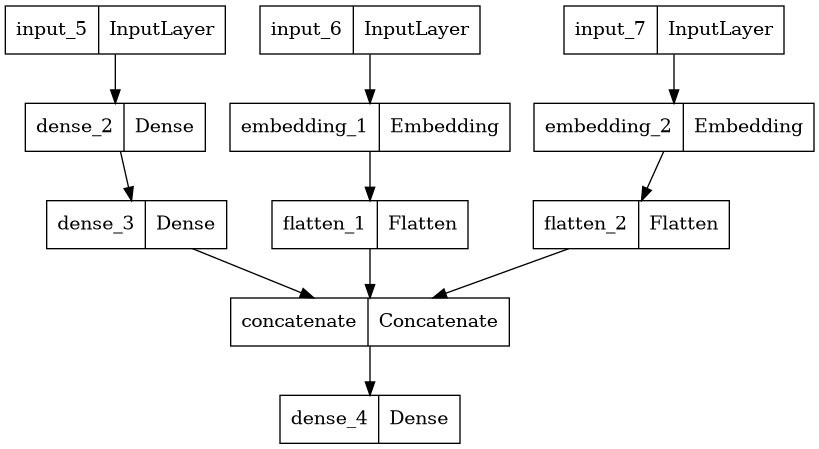

In [43]:
X_inputs = tf.keras.Input(shape=(X_train.shape[1],))
desc_inputs = tf.keras.Input(shape=(desc_train.shape[1],))
addr_inputs = tf.keras.Input(shape=(addr_train.shape[1],))

# X
X_dense1 = tf.keras.layers.Dense(128, activation='relu')(X_inputs)
X_dense2 = tf.keras.layers.Dense(128, activation='relu')(X_dense1)

# desc
desc_embedding = tf.keras.layers.Embedding(
    input_dim=10000,
    output_dim=64,
    input_length=desc_train.shape[1]
)(desc_inputs)
desc_flatten = tf.keras.layers.Flatten()(desc_embedding)

# addr
addr_embedding = tf.keras.layers.Embedding(
    input_dim=10000,
    output_dim=64,
    input_length=addr_train.shape[1]
)(addr_inputs)
addr_flatten = tf.keras.layers.Flatten()(addr_embedding)

# Concatenate results
concat = tf.keras.layers.concatenate([X_dense2, desc_flatten, addr_flatten])

# Make predictions
outputs = tf.keras.layers.Dense(3, activation='softmax')(concat)

model = tf.keras.Model(inputs=[X_inputs, desc_inputs, addr_inputs], outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

### Training

In [44]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    [X_train, desc_train, addr_train],
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/20
875/875 [==============================] - 29s 32ms/step - loss: 0.1322 - accuracy: 0.9556 - val_loss: 0.0138 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 2/20
875/875 [==============================] - 23s 26ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0088 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 3/20
875/875 [==============================] - 27s 31ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0100 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 4/20
875/875 [==============================] - 25s 28ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0075 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 5/20
875/875 [==============================] - 24s 27ms/step - loss: 4.3286e-04 - accuracy: 0.9999 - val_loss: 0.0075 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 6/20
875/875 [==============================] - 25s 29ms/step - loss: 1.7018e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 7/20
875/875 [==============================

### Results

In [47]:
results = model.evaluate([X_test, desc_test, addr_test], y_test)
results

469/469 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.9996 


[0.0029175851959735155, 0.9995999932289124]

In [49]:
print("Model Loss: {:.5f}".format(results[0]))
print("Model Accuracy: {:.2f}%".format(results[1]*100))

Model Loss: 0.00292
Model Accuracy: 99.96%
